In [1]:
import pathlib
from gnn_scheduler.utils import get_data_path


DATA_PATH = get_data_path()
experiment_numbers = [5, 28, 35, 40]
SELECTED_EXPERIMENTS = [
    f"experiment{"_" if num < 10 else ""}{num}{"_run_1" if num == 40 else ""}_results.csv"
    for num in experiment_numbers
]
EXPERIMENT_RESULTS = [
    f
    for f in pathlib.Path(DATA_PATH).glob("experiment*_results.csv")
    if f.is_file() and f.name in SELECTED_EXPERIMENTS
]
EXPERIMENT_RESULTS

[PosixPath('/home/pablo/VSCodeProjects/gnn_scheduler/data/experiment28_results.csv'),
 PosixPath('/home/pablo/VSCodeProjects/gnn_scheduler/data/experiment40_run_1_results.csv'),
 PosixPath('/home/pablo/VSCodeProjects/gnn_scheduler/data/experiment35_results.csv'),
 PosixPath('/home/pablo/VSCodeProjects/gnn_scheduler/data/experiment_5_results.csv')]

In [2]:
import pandas as pd

first_df = pd.read_csv(EXPERIMENT_RESULTS[0], index_col=0)
first_df.head()

,num_jobs,num_machines,makespan,optimality_gap,optimum,upper_bound,lower_bound
instance_name,,,,,,,
abz5,10,10,1450,1.175041,1234.0,1234,1234
abz6,10,10,982,1.041357,943.0,943,943
abz7,20,15,756,1.152439,656.0,656,656
abz8,20,15,774,1.181679,NaN,665,645
abz9,20,15,833,1.228614,678.0,678,678


In [3]:
dfs = [
    pd.read_csv(
        csv_file,
        usecols=[0, 3],
        index_col=0,
        skiprows=1,
        names=[
            "instance_name",
            f"makespan_{csv_file.stem.replace('_results', '')}",
        ],
    )
    for csv_file in sorted(EXPERIMENT_RESULTS)
]
dfs[0].head()

,makespan_experiment28
instance_name,
abz5,1450
abz6,982
abz7,756
abz8,774
abz9,833


In [4]:
sota_makespans = pd.read_csv(
    DATA_PATH / "sota_makespans.csv",
    index_col=0,
)
dfs.append(sota_makespans)

In [5]:
dfs_merged = pd.concat(dfs, axis=1)

In [6]:
dfs_merged["makespan_best_known"] = first_df["upper_bound"]
dfs_merged["num_machines"] = first_df["num_machines"]
dfs_merged["num_jobs"] = first_df["num_jobs"]
# size = f"{num_jobs} x {num_machines}"
dfs_merged["size"] = (
    dfs_merged["num_jobs"].astype(str)
    + "x"
    + dfs_merged["num_machines"].astype(str)
)
dfs_merged

,makespan_experiment28,makespan_experiment35,makespan_experiment40_run_1,makespan_experiment_5,makespan_schedulenet,makespan_l2s,makespan_l2d,makespan_schedulenet_mor,makespan_schedulenet_fifo,makespan_schedulenet_spt,makespan_rs,makespan_lee,makespan_best_known,num_machines,num_jobs,size
instance_name,,,,,,,,,,,,,,,,
abz5,1450,1382,1378,1299,1336,1353,NaN,1336,1467,1352,NaN,1305,1234,10,10,10x10
abz6,982,980,1078,1003,981,1043,NaN,1031,1045,1097,NaN,980,943,10,10,10x10
abz7,756,783,754,820,791,887,NaN,775,803,849,NaN,711,656,15,20,20x15
abz8,774,800,765,831,787,843,NaN,810,877,929,NaN,734,665,15,20,20x15
abz9,833,791,779,818,832,848,NaN,899,946,887,NaN,768,678,15,20,20x15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ta76,5728,5700,5632,5844,5773,5707,6135.0,5936,6183,6370,5487.0,5479,5342,20,100,100x20
ta77,5957,5653,5566,5706,5637,5737,6056.0,5829,5952,6045,5475.0,5485,5436,20,100,100x20
ta78,5808,5690,5404,5521,5833,5979,6101.0,5886,6328,6143,5426.0,5466,5394,20,100,100x20


In [7]:
makespans = dfs_merged.filter(like="makespan")
makespans.head()

,makespan_experiment28,makespan_experiment35,makespan_experiment40_run_1,makespan_experiment_5,makespan_schedulenet,makespan_l2s,makespan_l2d,makespan_schedulenet_mor,makespan_schedulenet_fifo,makespan_schedulenet_spt,makespan_rs,makespan_lee,makespan_best_known
instance_name,,,,,,,,,,,,,
abz5,1450,1382,1378,1299,1336,1353,NaN,1336,1467,1352,NaN,1305,1234
abz6,982,980,1078,1003,981,1043,NaN,1031,1045,1097,NaN,980,943
abz7,756,783,754,820,791,887,NaN,775,803,849,NaN,711,656
abz8,774,800,765,831,787,843,NaN,810,877,929,NaN,734,665
abz9,833,791,779,818,832,848,NaN,899,946,887,NaN,768,678


In [8]:
makespans.mean().sort_values()

makespan_best_known            1835.574074
makespan_lee                   1968.845679
makespan_experiment40_run_1    2023.098765
makespan_experiment_5          2076.598765
makespan_experiment35          2085.364198
makespan_experiment28          2088.185185
makespan_schedulenet           2125.586420
makespan_l2s                   2183.141975
makespan_schedulenet_mor       2200.901235
makespan_schedulenet_spt       2267.549383
makespan_schedulenet_fifo      2283.234568
makespan_rs                    2604.000000
makespan_l2d                   2939.775000
dtype: float64

In [9]:
# Add optimilaity gaps columns comparing to the best known makespan
for col in dfs_merged.columns:
    if "makespan" in col and "best_known" not in col:
        dfs_merged[col.replace("makespan", "gap")] = (
            dfs_merged[col] - dfs_merged["makespan_best_known"]
        ) / dfs_merged["makespan_best_known"]
dfs_merged.head()

,makespan_experiment28,makespan_experiment35,makespan_experiment40_run_1,makespan_experiment_5,makespan_schedulenet,makespan_l2s,makespan_l2d,makespan_schedulenet_mor,makespan_schedulenet_fifo,makespan_schedulenet_spt,...,gap_experiment40_run_1,gap_experiment_5,gap_schedulenet,gap_l2s,gap_l2d,gap_schedulenet_mor,gap_schedulenet_fifo,gap_schedulenet_spt,gap_rs,gap_lee
instance_name,,,,,,,,,,,,,,,,,,,,,
abz5,1450,1382,1378,1299,1336,1353,NaN,1336,1467,1352,...,0.116694,0.052674,0.082658,0.096434,NaN,0.082658,0.188817,0.095624,NaN,0.057536
abz6,982,980,1078,1003,981,1043,NaN,1031,1045,1097,...,0.143160,0.063627,0.040297,0.106045,NaN,0.093319,0.108165,0.163309,NaN,0.039236
abz7,756,783,754,820,791,887,NaN,775,803,849,...,0.149390,0.250000,0.205793,0.352134,NaN,0.181402,0.224085,0.294207,NaN,0.083841
abz8,774,800,765,831,787,843,NaN,810,877,929,...,0.150376,0.249624,0.183459,0.267669,NaN,0.218045,0.318797,0.396992,NaN,0.103759
abz9,833,791,779,818,832,848,NaN,899,946,887,...,0.148968,0.206490,0.227139,0.250737,NaN,0.325959,0.395280,0.308260,NaN,0.132743


In [10]:
# get column with the less average optimality gap across all instances (rows)
optimality_gaps = dfs_merged.filter(like="gap")
optimality_gaps.mean().sort_values()

gap_lee                   0.079932
gap_experiment40_run_1    0.119226
gap_rs                    0.125020
gap_experiment_5          0.144278
gap_experiment28          0.145855
gap_experiment35          0.147504
gap_schedulenet           0.164702
gap_l2s                   0.203052
gap_schedulenet_mor       0.209314
gap_schedulenet_spt       0.250448
gap_schedulenet_fifo      0.255938
gap_l2d                   0.270879
dtype: float64

In [11]:
makespans.mean().sort_values()

makespan_best_known            1835.574074
makespan_lee                   1968.845679
makespan_experiment40_run_1    2023.098765
makespan_experiment_5          2076.598765
makespan_experiment35          2085.364198
makespan_experiment28          2088.185185
makespan_schedulenet           2125.586420
makespan_l2s                   2183.141975
makespan_schedulenet_mor       2200.901235
makespan_schedulenet_spt       2267.549383
makespan_schedulenet_fifo      2283.234568
makespan_rs                    2604.000000
makespan_l2d                   2939.775000
dtype: float64

In [12]:
optimality_gaps.loc["ta74"]

gap_experiment28          0.041394
gap_experiment35          0.056378
gap_experiment40_run_1    0.000000
gap_experiment_5          0.010676
gap_schedulenet           0.032590
gap_l2s                   0.091403
gap_l2d                   0.102266
gap_schedulenet_mor       0.056752
gap_schedulenet_fifo      0.124368
gap_schedulenet_spt       0.135419
gap_rs                    0.013860
gap_lee                   0.020041
Name: ta74, dtype: float64

In [13]:
# reomve "gap_" and "makespan_" prefixes
optimality_gaps.columns = optimality_gaps.columns.str.replace(
    "gap_", "", regex=False
)
makespans.columns = makespans.columns.str.replace(
    "makespan_", "", regex=False
)
makespans.loc["ta74"].sort_values()

experiment40_run_1    5339.0
best_known            5339.0
experiment_5          5396.0
rs                    5413.0
lee                   5446.0
schedulenet           5513.0
experiment28          5560.0
experiment35          5640.0
schedulenet_mor       5642.0
l2s                   5827.0
l2d                   5885.0
schedulenet_fifo      6003.0
schedulenet_spt       6062.0
Name: ta74, dtype: float64

In [30]:
# rename columns
mapping = {
    "experiment_5": "Non-MP (Ours)",
    "experiment28": "RGIN (Ours)",
    "experiment40_run_1": "RGATv2 (Ours)",
    "rs": "RS",
    "lee": "Lee",
    "schedulenet": "ScheduleNet",
    "l2s": "L2S",
    "l2d": "L2D",
}
optimality_gaps = optimality_gaps.copy()
makespans = makespans.copy()
optimality_gaps.rename(columns=mapping, inplace=True, errors="ignore")
makespans.rename(columns=mapping, inplace=True, errors="ignore")
optimality_gaps.head()

,RGIN (Ours),experiment35,RGATv2 (Ours),Non-MP (Ours),ScheduleNet,L2S,L2D,schedulenet_mor,schedulenet_fifo,schedulenet_spt,RS,Lee
instance_name,,,,,,,,,,,,
abz5,0.175041,0.119935,0.116694,0.052674,0.082658,0.096434,NaN,0.082658,0.188817,0.095624,NaN,0.057536
abz6,0.041357,0.039236,0.143160,0.063627,0.040297,0.106045,NaN,0.093319,0.108165,0.163309,NaN,0.039236
abz7,0.152439,0.193598,0.149390,0.250000,0.205793,0.352134,NaN,0.181402,0.224085,0.294207,NaN,0.083841
abz8,0.163910,0.203008,0.150376,0.249624,0.183459,0.267669,NaN,0.218045,0.318797,0.396992,NaN,0.103759
abz9,0.228614,0.166667,0.148968,0.206490,0.227139,0.250737,NaN,0.325959,0.395280,0.308260,NaN,0.132743


In [15]:
optimality_gaps_pdrs = optimality_gaps.copy()
optimality_gaps_pdrs = optimality_gaps_pdrs[
    [col for col in optimality_gaps_pdrs.columns if "schedulenet" in col]
]
makespans_pdrs = makespans.copy()
makespans_pdrs = makespans_pdrs[
    [col for col in makespans_pdrs.columns if "schedulenet" in col]
]
makespans_pdrs

,schedulenet_mor,schedulenet_fifo,schedulenet_spt
instance_name,,,
abz5,1336,1467,1352
abz6,1031,1045,1097
abz7,775,803,849
abz8,810,877,929
abz9,899,946,887
...,...,...,...
ta76,5936,6183,6370
ta77,5829,5952,6045
ta78,5886,6328,6143


In [16]:
# Rename columns
mapping_pdrs = {
    "schedulenet_mor": "ScheduleNet's MOR",
    "schedulenet_fifo": "ScheduleNet's FCFS",
    "schedulenet_spt": "ScheduleNet's SPT",
}
optimality_gaps_pdrs.rename(
    columns=mapping_pdrs, inplace=True, errors="ignore"
)
makespans_pdrs.rename(
    columns=mapping_pdrs, inplace=True, errors="ignore"
)
optimality_gaps_pdrs.head()

,ScheduleNet's MOR,ScheduleNet's FCFS,ScheduleNet's SPT
instance_name,,,
abz5,0.082658,0.188817,0.095624
abz6,0.093319,0.108165,0.163309
abz7,0.181402,0.224085,0.294207
abz8,0.218045,0.318797,0.396992
abz9,0.325959,0.395280,0.308260


## Grouping by benchmark and size

In [17]:
# group values by intance name prefix (e.g., "abz5" and "abz9" -> "abz")
# New dataframe with indices values renamed to the prefix (replace numbers with "")
optimality_gaps_copy = optimality_gaps.copy()
optimality_gaps_copy.index = optimality_gaps_copy.index.str.replace(
    r"\d+", "", regex=True
)
# Add size to the index
optimality_gaps_copy.index = (
    optimality_gaps_copy.index + "_" + dfs_merged["size"]
)
optimality_gaps_copy.head()

# group by index (instance_name)
optimality_gaps_grouped = optimality_gaps_copy.groupby(
    optimality_gaps_copy.index
).mean()

In [18]:
makespans_copy = makespans.copy()
makespans_copy.index = makespans_copy.index.str.replace(r"\d+", "", regex=True)
# Add size to the index
makespans_copy.index = makespans_copy.index + "_" + dfs_merged["size"]
makespans_grouped = makespans_copy.groupby(makespans_copy.index).mean()
makespans_grouped.loc["ta_100x20"].sort_values()

best_known          5365.7
Lee                 5491.6
RGATv2 (Ours)       5491.9
RS                  5506.6
experiment35        5617.0
Non-MP (Ours)       5635.2
ScheduleNet         5723.6
RGIN (Ours)         5834.0
schedulenet_mor     5856.9
L2S                 5862.8
schedulenet_fifo    6095.0
L2D                 6097.6
schedulenet_spt     6139.0
Name: ta_100x20, dtype: float64

In [19]:
ta_sizes = [
    "ta_15x15",
    "ta_20x15",
    "ta_20x20",
    "ta_30x15",
    "ta_30x20",
    "ta_50x15",
    "ta_50x20",
    "ta_100x20",
]

In [20]:
wheatley_makespan = {
    "ta_15x15": 1389,
    "ta_20x15": 1583,
    "ta_20x20": 1959,
    "ta_30x10": 1829,
    "ta_30x15": 2043,
    "ta_30x20": 2377,
    "ta_50x15": 3060,
    "ta_50x20": 3322,
    "ta_100x20": 5886,
}

wheatley_optimality_gap = {
    "ta_15x15": 0.172,
    "ta_20x15": 0.16899999999999998,
    "ta_20x20": 0.249,
    "ta_30x10": 0.055,
    "ta_30x15": 0.145,
    "ta_30x20": 0.22,
    "ta_50x15": 0.083,
    "ta_50x20": 0.149,
    "ta_100x20": 0.069,
}

In [21]:
optimality_gaps_grouped

,RGIN (Ours),experiment35,RGATv2 (Ours),Non-MP (Ours),ScheduleNet,L2S,L2D,schedulenet_mor,schedulenet_fifo,schedulenet_spt,RS,Lee
abz_10x10,0.108199,0.079586,0.129927,0.058150,0.061477,0.101239,NaN,0.087989,0.148491,0.129466,NaN,0.048386
abz_20x15,0.181654,0.187757,0.149578,0.235371,0.205463,0.290180,NaN,0.241802,0.312721,0.333153,NaN,0.106781
ft_10x10,0.095699,0.091398,0.137634,0.159140,0.194624,0.227957,NaN,0.250538,0.273118,0.154839,NaN,0.070968
ft_20x5,0.149356,0.148498,0.070386,0.107296,0.285837,0.148498,NaN,0.374249,0.412017,0.087554,NaN,0.032618
ft_6x6,0.072727,0.109091,0.072727,0.109091,0.072727,0.290909,NaN,0.072727,0.181818,0.600000,NaN,0.054545
la_10x10,0.146614,0.120014,0.133149,0.117774,0.119499,0.170586,NaN,0.180960,0.253234,0.156746,NaN,0.028271
la_10x5,0.135690,0.146719,0.064431,0.110923,0.121214,0.160629,NaN,0.159606,0.179525,0.148089,NaN,0.045898
la_15x10,0.133276,0.148079,0.127732,0.127285,0.145970,0.219652,NaN,0.236669,0.294045,0.286882,NaN,0.085392
la_15x15,0.162966,0.170306,0.134630,0.147720,0.160720,0.214025,NaN,0.180619,0.252991,0.245868,NaN,0.108414
la_15x5,0.038905,0.049236,0.036300,0.026273,0.026517,0.010884,NaN,0.039312,0.095720,0.148614,NaN,0.000631


In [22]:
taillard_gaps = optimality_gaps_grouped.T[ta_sizes].copy()
taillard_gaps

,ta_15x15,ta_20x15,ta_20x20,ta_30x15,ta_30x20,ta_50x15,ta_50x20,ta_100x20
RGIN (Ours),0.182449,0.174094,0.173452,0.167160,0.197583,0.129084,0.135600,0.087339
experiment35,0.147794,0.177616,0.171552,0.201962,0.210590,0.113139,0.131097,0.046835
RGATv2 (Ours),0.185440,0.170211,0.187619,0.161464,0.184952,0.073921,0.101884,0.023654
Non-MP (Ours),0.179567,0.204368,0.189772,0.183696,0.207745,0.119247,0.136912,0.050408
ScheduleNet,0.152980,0.194430,0.172456,0.190791,0.237228,0.138648,0.135252,0.066566
L2S,0.201334,0.249605,0.292506,0.246958,0.319738,0.159235,0.212958,0.092434
L2D,0.259646,0.300408,0.316065,0.329974,0.335916,0.223780,0.265141,0.136100
schedulenet_mor,0.205323,0.235608,0.217076,0.228222,0.249099,0.173661,0.176843,0.091523
schedulenet_fifo,0.239366,0.314266,0.273931,0.311975,0.310958,0.206748,0.239327,0.135661
schedulenet_spt,0.258888,0.328259,0.277518,0.352658,0.344063,0.241089,0.255396,0.144081


In [23]:
# Add a new row to the taillard_gaps dataframe with the dictionary values
taillard_gaps.loc["Wheatley"] = [
    wheatley_optimality_gap[size] for size in ta_sizes
]
taillard_gaps

,ta_15x15,ta_20x15,ta_20x20,ta_30x15,ta_30x20,ta_50x15,ta_50x20,ta_100x20
RGIN (Ours),0.182449,0.174094,0.173452,0.167160,0.197583,0.129084,0.135600,0.087339
experiment35,0.147794,0.177616,0.171552,0.201962,0.210590,0.113139,0.131097,0.046835
RGATv2 (Ours),0.185440,0.170211,0.187619,0.161464,0.184952,0.073921,0.101884,0.023654
Non-MP (Ours),0.179567,0.204368,0.189772,0.183696,0.207745,0.119247,0.136912,0.050408
ScheduleNet,0.152980,0.194430,0.172456,0.190791,0.237228,0.138648,0.135252,0.066566
L2S,0.201334,0.249605,0.292506,0.246958,0.319738,0.159235,0.212958,0.092434
L2D,0.259646,0.300408,0.316065,0.329974,0.335916,0.223780,0.265141,0.136100
schedulenet_mor,0.205323,0.235608,0.217076,0.228222,0.249099,0.173661,0.176843,0.091523
schedulenet_fifo,0.239366,0.314266,0.273931,0.311975,0.310958,0.206748,0.239327,0.135661
schedulenet_spt,0.258888,0.328259,0.277518,0.352658,0.344063,0.241089,0.255396,0.144081


In [24]:
def extract_size_as_tuple(size_str):
    """
    Extract the size as a tuple of integers from the string.

    """
    # remove the prefix (e.g., "ta_")
    size_str = size_str.split("_")[-1]
    return tuple(map(int, size_str.split("x")))

In [25]:
sorted(
    filter(lambda x: "ta" in x, optimality_gaps_grouped.index),
    key=lambda x: extract_size_as_tuple(x),
)

['ta_15x15',
 'ta_20x15',
 'ta_20x20',
 'ta_30x15',
 'ta_30x20',
 'ta_50x15',
 'ta_50x20',
 'ta_100x20']

In [26]:
# Remove "gap_" prefix from all columns
optimality_gaps_grouped.columns = optimality_gaps_grouped.columns.str.replace(
    "gap_", "", regex=False
)

<Axes: xlabel='Benchmark and Size', ylabel='Average Optimality Gap'>

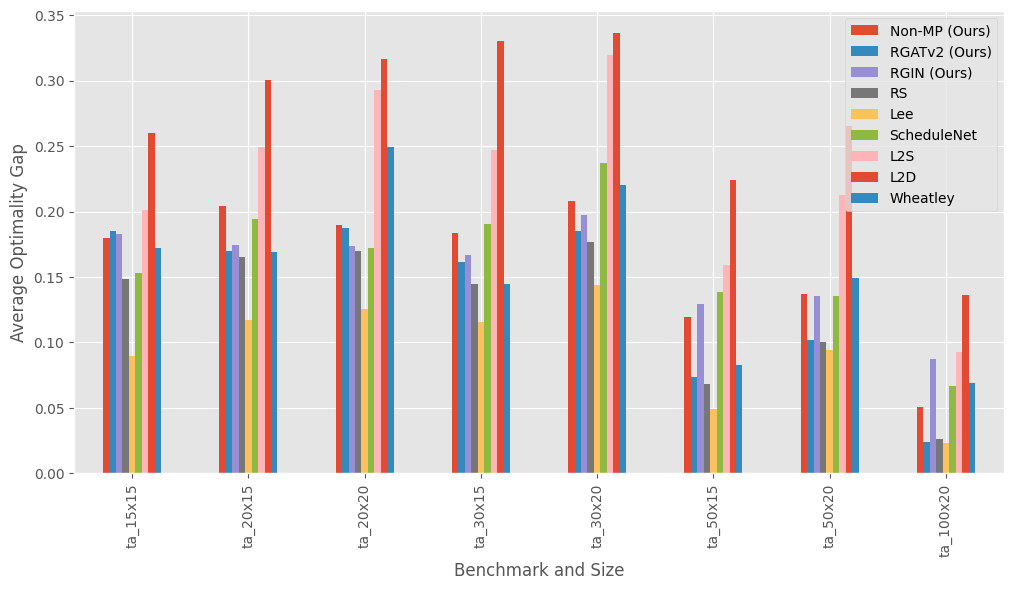

In [27]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
taillard_gaps[
    sorted(
        filter(lambda x: "ta" in x, optimality_gaps_grouped.index),
        key=lambda x: extract_size_as_tuple(x),
    )
].loc[
    list(mapping.values()) + ["Wheatley"]
].T.plot(
    kind="bar",
    figsize=(12, 6),
    title="",
    ylabel="Average Optimality Gap",
    xlabel="Benchmark and Size",
    legend=True,
    grid=True,
)

/tmp/ipykernel_32059/927166572.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10").colors


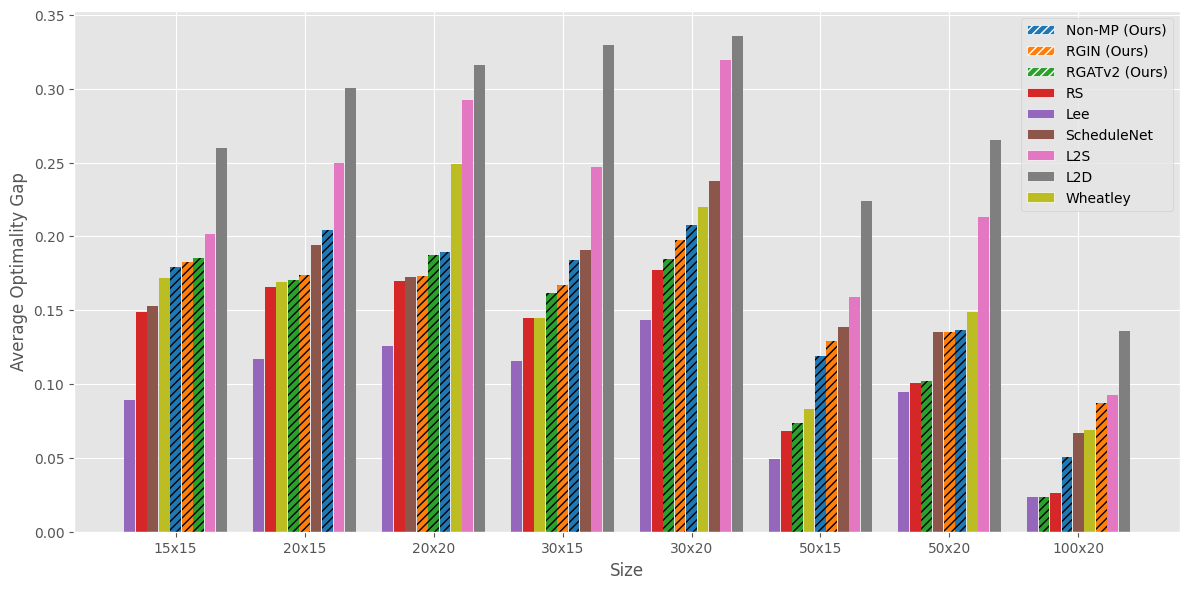

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ta_benchmark_instances_sorted = sorted(
    filter(lambda x: "ta" in x, taillard_gaps.T.index),
    key=extract_size_as_tuple,
)

experiments_selection_order = list(
    mapping.values()
) + ["Wheatley"]
display_name_map = {
    "experiment_5": "PE-Only (Ours)",
    "experiment40_run_1": "GATv2 (Ours)",
    "rs": "RS",
    "lee": "Lee",
    "schedulenet": "ScheduleNet",
    "l2s": "L2S",
    "l2d": "L2D",
}

valid_experiments_for_plot = [
    exp
    for exp in experiments_selection_order
    if exp in taillard_gaps.T.columns
]

if not ta_benchmark_instances_sorted:
    print(
        "Warning: No 'ta' benchmark instances found after filtering. Plot will be empty."
    )
if not valid_experiments_for_plot:
    print(
        "Warning: None of the specified experiments for plotting are in the DataFrame columns. Plot will be empty."
    )

if ta_benchmark_instances_sorted and valid_experiments_for_plot:
    df_plot_source = taillard_gaps.T.loc[
        ta_benchmark_instances_sorted, valid_experiments_for_plot
    ]
else:
    df_plot_source = pd.DataFrame(columns=valid_experiments_for_plot)

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12, 6))

num_benchmark_groups = len(df_plot_source.index)
max_bars_per_group = len(df_plot_source.columns)

group_center_positions = np.arange(num_benchmark_groups)

bar_width = 0.8 / max_bars_per_group if max_bars_per_group > 0 else 0.8

color_palette = plt.cm.get_cmap("tab10").colors
experiment_color_map = {
    exp_name: color_palette[i % len(color_palette)]
    for i, exp_name in enumerate(valid_experiments_for_plot)
}

for i, benchmark_name in enumerate(df_plot_source.index):
    current_benchmark_gaps = df_plot_source.loc[benchmark_name]
    current_benchmark_gaps_no_nan = current_benchmark_gaps.dropna()
    sorted_gaps_for_benchmark = current_benchmark_gaps_no_nan.sort_values()
    num_bars_in_this_group = len(sorted_gaps_for_benchmark)

    for j, (experiment_name, gap_value) in enumerate(
        sorted_gaps_for_benchmark.items()
    ):
        bar_offset_from_group_center = (
            j - (num_bars_in_this_group - 1) / 2.0
        ) * bar_width
        actual_bar_position = (
            group_center_positions[i] + bar_offset_from_group_center
        )

        current_display_name = display_name_map.get(
            experiment_name, experiment_name
        )
        hatch_pattern = None
        if "(Ours)" in current_display_name:
            hatch_pattern = "////"

        ax.bar(
            actual_bar_position,
            gap_value,
            width=bar_width * 0.95,
            color=experiment_color_map[experiment_name],
            align="center",
            hatch=hatch_pattern,
        )

ax.set_ylabel("Average Optimality Gap")
ax.set_xlabel("Size")
ax.set_title("")
ax.set_xticks(group_center_positions)

x_tick_labels_display = []
if num_benchmark_groups > 0:
    x_tick_labels_display = [
        name.split("_", 1)[1] if "_" in name else name
        for name in df_plot_source.index
    ]
ax.set_xticklabels(x_tick_labels_display, rotation=0, ha="center")

ax.grid(True)

if valid_experiments_for_plot:
    legend_handles = []
    legend_labels_display = []
    for exp_key in valid_experiments_for_plot:
        display_name = display_name_map.get(exp_key, exp_key)
        legend_labels_display.append(display_name)

        hatch_pattern_legend = None
        if "(Ours)" in display_name:
            hatch_pattern_legend = "////"

        rect = plt.Rectangle(
            (0, 0),
            1,
            1,
            facecolor=experiment_color_map[exp_key],
            hatch=hatch_pattern_legend,
            edgecolor="white",
        )
        legend_handles.append(rect)

    ax.legend(
        legend_handles,
        legend_labels_display,
        title="",
        loc="upper right",
    )

plt.tight_layout()
# save to pdf
plt.savefig(
    DATA_PATH / "optimality_gaps_ta_benchmarks.pdf",
    bbox_inches="tight",
)

In [ ]:
optimality_gaps_grouped

,experiment13,experiment14,experiment15,experiment16,experiment17,experiment18,experiment21,experiment22,experiment23,experiment24,...,experiment_5,experiment_9,schedulenet,l2s,l2d,schedulenet_mor,schedulenet_fifo,schedulenet_spt,rs,lee
abz_10x10,0.104812,0.064909,0.125817,0.084462,0.142323,0.060137,0.102401,0.083888,0.058766,0.108199,...,0.058150,0.079975,0.061477,0.101239,NaN,0.087989,0.148491,0.129466,NaN,0.048386
abz_20x15,0.193621,0.244318,0.204907,0.219125,0.201825,0.197025,0.325537,0.248680,0.205702,0.201490,...,0.235371,0.272771,0.205463,0.290180,NaN,0.241802,0.312721,0.333153,NaN,0.106781
ft_10x10,0.224731,0.224731,0.167742,0.166667,0.217204,0.207527,0.181720,0.143011,0.082796,0.175269,...,0.159140,0.217204,0.194624,0.227957,NaN,0.250538,0.273118,0.154839,NaN,0.070968
ft_20x5,0.207725,0.408584,0.329614,0.181116,0.119313,0.260944,0.315021,0.138197,0.161373,0.122747,...,0.107296,0.342489,0.285837,0.148498,NaN,0.374249,0.412017,0.087554,NaN,0.032618
ft_6x6,0.072727,0.072727,0.090909,0.236364,0.090909,0.072727,0.072727,0.090909,0.072727,0.072727,...,0.109091,0.072727,0.072727,0.290909,NaN,0.072727,0.181818,0.600000,NaN,0.054545
la_10x10,0.130688,0.129293,0.130007,0.156426,0.129022,0.167922,0.114175,0.151288,0.121093,0.176210,...,0.117774,0.142414,0.119499,0.170586,NaN,0.180960,0.253234,0.156746,NaN,0.028271
la_10x5,0.094930,0.124851,0.148118,0.123432,0.121303,0.114363,0.145448,0.121822,0.101476,0.092055,...,0.110923,0.142349,0.121214,0.160629,NaN,0.159606,0.179525,0.148089,NaN,0.045898
la_15x10,0.156609,0.137055,0.142703,0.155614,0.159711,0.163101,0.178338,0.116715,0.137984,0.125395,...,0.127285,0.137178,0.145970,0.219652,NaN,0.236669,0.294045,0.286882,NaN,0.085392
la_15x15,0.159516,0.194309,0.155771,0.181406,0.235447,0.164091,0.291644,0.170417,0.189128,0.167015,...,0.147720,0.204856,0.160720,0.214025,NaN,0.180619,0.252991,0.245868,NaN,0.108414
la_15x5,0.029758,0.041216,0.020792,0.027865,0.032304,0.020127,0.018504,0.043484,0.027199,0.009466,...,0.026273,0.024418,0.026517,0.010884,NaN,0.039312,0.095720,0.148614,NaN,0.000631


In [ ]:
optimality_gaps_grouped.T[
    sorted(
        filter(lambda x: "la" in x, optimality_gaps_grouped.index),
        key=lambda x: extract_size_as_tuple(x),
    )
].loc[
    [
        "lee",
        "rs",
        "experiment_5",
        "experiment28",
        "experiment24",
        "schedulenet",
        "l2s",
        "l2d",
    ]
].T

,lee,rs,experiment_5,experiment28,experiment24,schedulenet,l2s,l2d
la_10x5,0.045898,NaN,0.110923,0.135690,0.092055,0.121214,0.160629,NaN
la_10x10,0.028271,NaN,0.117774,0.146614,0.176210,0.119499,0.170586,NaN
la_15x5,0.000631,NaN,0.026273,0.038905,0.009466,0.026517,0.010884,NaN
la_15x10,0.085392,NaN,0.127285,0.133276,0.125395,0.145970,0.219652,NaN
la_15x15,0.108414,NaN,0.147720,0.162966,0.167015,0.160720,0.214025,NaN
la_20x5,0.000870,NaN,0.009927,0.023684,0.016901,0.036389,0.021265,NaN
la_20x10,0.058581,NaN,0.141767,0.135768,0.127453,0.157199,0.272565,NaN
la_30x10,0.009027,NaN,0.021202,0.039404,0.012704,0.030975,0.062700,NaN


In [ ]:
o

In [ ]:
# Print ranking per category
optimality_gaps_grouped.T.rank(axis=0, ascending=True).T.mean().sort_values()

lee                      1.038462
rs                       2.750000
experiment40_run_1       6.076923
experiment_5             9.403846
experiment33             9.596154
experiment24_retrial     9.884615
experiment34            10.192308
experiment32            10.461538
experiment24            10.596154
experiment28            10.807692
experiment35            10.846154
experiment23            10.884615
experiment16            13.269231
schedulenet             13.461538
experiment29            13.653846
experiment18            14.538462
experiment15            14.750000
experiment22            15.230769
experiment13            15.288462
experiment14            16.903846
experiment17            18.788462
experiment_9            18.903846
l2s                     20.173077
experiment21            20.192308
schedulenet_mor         20.692308
experiment_4            22.519231
schedulenet_spt         23.500000
schedulenet_fifo        25.115385
l2d                     25.750000
dtype: float64

In [ ]:
# group values by intance name prefix (e.g., "abz5" and "abz9" -> "abz")
# New dataframe with indices values renamed to the prefix (replace numbers with "")
makespans_renamed = makespans.copy()
makespans_renamed.index = makespans_renamed.index.str.replace(
    r"\d+", "", regex=True
)

# group by index (instance_name)
makespans_grouped = makespans_renamed.groupby(makespans_renamed.index).mean()
makespans_grouped.T.sort_values(by="ta", ascending=True)

# remove "makespan_" from "instance_name" column
makespans_grouped.columns = makespans_grouped.columns.str.replace(
    r"makespan_", "", regex=True
)
makespans_grouped.T.sort_values(by="ta", ascending=True)

instance_name,abz,ft,la,orb,swv,ta,yn
best_known,835.2,716.666667,1107.275,902.8,2236.80,2366.6750,912.00
lee,899.6,752.333333,1152.325,986.3,2395.30,2552.2375,1039.25
rs,NaN,NaN,NaN,NaN,NaN,2604.0000,NaN
experiment40_run_1,950.8,788.000000,1186.750,1037.3,2447.45,2620.2000,1054.00
experiment33,943.0,830.666667,1203.550,1068.5,2693.50,2649.4875,1067.25
experiment34,940.8,835.000000,1205.775,1063.8,2663.05,2658.5625,1060.25
experiment35,947.2,804.666667,1213.125,1061.4,2697.35,2667.4625,1049.00
experiment32,943.6,820.000000,1212.750,1068.1,2672.90,2669.0750,1066.25
experiment_5,954.2,809.666667,1197.950,1046.7,2595.30,2682.2375,1084.75
experiment28,959.0,805.666667,1212.950,1070.6,2595.00,2695.9750,1068.00


In [ ]:
makespans_grouped

,experiment13,experiment14,experiment15,experiment16,experiment17,experiment18,experiment21,experiment22,experiment23,experiment24,...,experiment_9,schedulenet,l2s,l2d,schedulenet_mor,schedulenet_fifo,schedulenet_spt,rs,lee,best_known
instance_name,,,,,,,,,,,,,,,,,,,,,
abz,960.400000,962.200000,975.600000,959.800,979.40,941.600000,1013.600000,973.400000,944.200000,966.8000,...,978.800000,945.400000,994.800000,NaN,970.20,1027.600000,1022.800000,NaN,899.600000,835.200000
ft,868.333333,946.333333,898.333333,843.000,832.00,883.666667,896.666667,816.333333,806.333333,820.0000,...,918.333333,889.333333,850.333333,NaN,941.00,964.666667,809.666667,NaN,752.333333,716.666667
la,1213.800000,1231.750000,1216.850000,1219.800,1247.75,1218.425000,1249.250000,1218.825000,1199.350000,1201.5250,...,1230.425000,1212.375000,1258.725000,NaN,1253.55,1310.600000,1329.600000,NaN,1152.325000,1107.275000
orb,1079.100000,1120.100000,1119.300000,1053.000,1090.20,1083.700000,1070.800000,1068.700000,1042.300000,1041.3000,...,1073.600000,1087.000000,1100.900000,NaN,1168.00,1178.200000,1139.600000,NaN,986.300000,902.800000
swv,2716.900000,2719.800000,2596.300000,2493.700,2588.30,2773.450000,2531.050000,2494.350000,2506.450000,2501.2000,...,2620.500000,2865.750000,2711.300000,NaN,3016.20,3031.000000,2714.750000,NaN,2395.300000,2236.800000
ta,2761.337500,2764.237500,2736.837500,2728.525,2913.75,2715.100000,3120.900000,2876.437500,2761.675000,2722.5875,...,2941.087500,2699.300000,2825.050000,2939.775,2778.00,2905.450000,2951.975000,2604.0,2552.237500,2366.675000
yn,1146.750000,1073.000000,1070.750000,1078.500,1105.25,1095.000000,1210.750000,1070.000000,1083.250000,1091.0000,...,1164.500000,1081.500000,1139.000000,NaN,1121.50,1147.500000,1191.750000,NaN,1039.250000,912.000000
